<a href="https://colab.research.google.com/github/AvantiShri/colab_notebooks/blob/master/SPI1_regression/TrainRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
![[ -e SPI1_negatives.tsv.gz ]] || wget -O SPI1_negatives.tsv.gz http://mitra.stanford.edu/kundaje/avanti/regression_labels_SPI1_GM12878/positives_in_peaks/SPI1_negatives.tsv.gz -O SPI1_negatives.tsv.gz
![[ -e SPI1_positives_regression_labels.tsv.gz ]] || wget -O SPI1_positives_regression_labels.tsv.gz http://mitra.stanford.edu/kundaje/avanti/regression_labels_SPI1_GM12878/positives_in_peaks/SPI1_positives_regression_labels.tsv.gz

#download hg38 fasta file
![[ -e hg38.fa ]] || wget https://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz -O hg38.fa.gz
![[ -e hg38.fa ]] || gunzip hg38.fa.gz

#install pyfaidx and prepare an index for hg38.fa
!pip install pyfaidx
from pyfaidx import Fasta
Fasta("hg38.fa") #this will build the index if it does not exist

--2019-09-05 07:00:55--  http://mitra.stanford.edu/kundaje/avanti/regression_labels_SPI1_GM12878/positives_in_peaks/SPI1_negatives.tsv.gz
Resolving mitra.stanford.edu (mitra.stanford.edu)... 171.67.96.243
Connecting to mitra.stanford.edu (mitra.stanford.edu)|171.67.96.243|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 242572693 (231M) [application/x-gzip]
Saving to: ‘SPI1_negatives.tsv.gz’

SPI1_negatives.tsv. 100%[===================>] 231.33M  5.38MB/s    in 67s     

2019-09-05 07:02:02 (3.46 MB/s) - ‘SPI1_negatives.tsv.gz’ saved [242572693/242572693]

--2019-09-05 07:02:03--  http://mitra.stanford.edu/kundaje/avanti/regression_labels_SPI1_GM12878/positives_in_peaks/SPI1_positives_regression_labels.tsv.gz
Resolving mitra.stanford.edu (mitra.stanford.edu)... 171.67.96.243
Connecting to mitra.stanford.edu (mitra.stanford.edu)|171.67.96.243|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4179271 (4.0M) [application/x-gzip]
Saving to: ‘

Fasta("hg38.fa")

In [0]:
![[ -e noheader_SPI1_negatives.tsv.gz ]] || zcat SPI1_negatives.tsv.gz | grep -v 'START' | gzip -c > noheader_SPI1_negatives.tsv.gz
![[ -e noheader_SPI1_positives_regression_labels.tsv.gz ]] || zcat SPI1_positives_regression_labels.tsv.gz | grep -v 'START' | gzip -c > noheader_SPI1_positives_regression_labels.tsv.gz

!zcat noheader_SPI1_negatives.tsv.gz | egrep -v -w 'chr1|chr8|chr21|chr22' | gzip -c > train_SPI1_negatives.tsv.gz
!zcat noheader_SPI1_positives_regression_labels.tsv.gz | egrep -v -w 'chr1|chr8|chr21|chr22' | gzip -c > train_SPI1_positives_regression_labels.tsv.gz
!zcat noheader_SPI1_negatives.tsv.gz | egrep -w 'chr1|chr8|chr21' | gzip -c > test_SPI1_coords.tsv.gz
!zcat noheader_SPI1_positives_regression_labels.tsv.gz | egrep -w 'chr1|chr8|chr21' | gzip -c >> test_SPI1_coords.tsv.gz

In [0]:
!zcat noheader_SPI1_negatives.tsv.gz | egrep -w 'chr1' | gzip -c > minitrain_SPI1_negatives.tsv.gz
!zcat noheader_SPI1_positives_regression_labels.tsv.gz | egrep -w 'chr1' | gzip -c > minitrain_SPI1_positives_regression_labels.tsv.gz

In [5]:
#num negs in validation set
!zcat noheader_SPI1_negatives.tsv.gz | egrep -w 'chr22'  | wc -l

995472


In [6]:
#num pos in validation set
!zcat noheader_SPI1_positives_regression_labels.tsv.gz | egrep -w 'chr22' | wc -l

6127


In [7]:
#combine the positives and negatives in the validation set; subsample the
# validation set for speed of calculation
!zcat noheader_SPI1_negatives.tsv.gz | egrep -w 'chr22' | perl -ne 'if ($.%25==0) {print $_}' | gzip -c > negsubsampled_valid.tsv.gz
!zcat noheader_SPI1_positives_regression_labels.tsv.gz | egrep -w 'chr22' | gzip -c >> negsubsampled_valid.tsv.gz
!zcat negsubsampled_valid.tsv.gz | wc -l

45945


In [8]:
pip install tqdm

In [9]:
!git clone https://github.com/kundajelab/seqdataloader.git

Cloning into 'seqdataloader'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 1124 (delta 57), reused 89 (delta 31), pack-reused 1003
Receiving objects: 100% (1124/1124), 3.92 MiB | 6.25 MiB/s, done.
Resolving deltas: 100% (683/683), done.


In [10]:
%cd /content/seqdataloader
!git checkout downsamplenegatives
!git pull
!pip uninstall seqdataloader
!pip install .
%cd /content

/content/seqdataloader
Branch 'downsamplenegatives' set up to track remote branch 'downsamplenegatives' from 'origin'.
Switched to a new branch 'downsamplenegatives'
Already up to date.
Processing /content/seqdataloader
     |████████████████████████████████| 194kB 6.8MB/s 
     |████████████████████████████████| 12.5MB 38.1MB/s 
     |████████████████████████████████| 71kB 27.0MB/s 
     |████████████████████████████████| 3.2MB 34.7MB/s 
     |████████████████████████████████| 51kB 24.6MB/s 
  Created wheel for seqdataloader: filename=seqdataloader-0.126-cp36-none-any.whl size=27501 sha256=a736ca6a900d8551cda69e05128e410e8652ea9e91f8fccc4b3ca4fdcd6e8eda
  Stored in directory: /tmp/pip-ephem-wheel-cache-yxpjrksr/wheels/c2/db/13/112d41662f69fb8c7986c218293570cc1550fc21eed966e31b
  Created wheel for deeptools: filename=deepTools-3.3.0-cp36-none-any.whl size=209149 sha256=fa4c46dde363963982d8828f3b59ddfd732680e9607feb07e15d61bbe5671aa1
  Stored in directory: /root/.cache/pip/wheels/de/22/

In [1]:
from seqdataloader.batchproducers import coordbased
import numpy as np

regression_coordstovals = coordbased.coordstovals.lookup.SimpleLookup(
    lookup_file="noheader_SPI1_positives_regression_labels.tsv.gz")
classification_coordstovals = coordbased.coordstovals.lookup.SimpleLookup(
    lookup_file="noheader_SPI1_positives_regression_labels.tsv.gz",
    transformation=lambda x: 1.0 if x > 0 else 0.0)
targets_coordstovals = coordbased.coordstovals.core.CoordsToValsJoiner(
                        [classification_coordstovals, regression_coordstovals])

input_coordstovals = coordbased.coordstovals.fasta.PyfaidxCoordsToVals(
    genome_fasta_path="hg38.fa")

valid_batchproducer = coordbased.coordbatchproducers.SimpleCoordsBatchProducer(
    bed_file="negsubsampled_valid.tsv.gz",
    batch_size=64,
    shuffle_before_epoch=False,
    seed=None)

train_batchproducer = (
  coordbased.coordbatchproducers.DownsampleNegativesCoordsBatchProducer(
    pos_bed_file="minitrain_SPI1_positives_regression_labels.tsv.gz",
    neg_bed_file="minitrain_SPI1_negatives.tsv.gz",
    target_proportion_positives=0.5,
    batch_size=64,
    shuffle_before_epoch=True,
    seed=1234))

train_batch_generator = coordbased.core.KerasBatchGenerator(
    coordsbatch_producer=train_batchproducer,
    inputs_coordstovals=input_coordstovals,
    targets_coordstovals=targets_coordstovals,
    coordsbatch_transformer=\
      coordbased.coordbatchtransformers.ReverseComplementAugmenter())

valid_batch_generator = coordbased.core.KerasBatchGenerator(
    coordsbatch_producer=valid_batchproducer,
    inputs_coordstovals=input_coordstovals,
    targets_coordstovals=targets_coordstovals)


Using TensorFlow backend.


Heads up: coordinates in bed file are assumed to be on the positive strand; if strand in the bed file is improtant to you, please add that feature to SimpleCoordsBatchProducer
Reading in positive bed file
Heads up: coordinates in bed file are assumed to be on the positive strand; if strand in the bed file is improtant to you, please add that feature to SimpleCoordsBatchProducer
Got 31302  coords in positive bed file
Reading in negative bed file
Heads up: coordinates in bed file are assumed to be on the positive strand; if strand in the bed file is improtant to you, please add that feature to SimpleCoordsBatchProducer
Got 4881439  coords in negative bed file
The target proportion of positives of 0.5 requires the negative set to be subsampled by a factor of 156 which will result in a #neg of 31291
Using an offset of  0  before striding


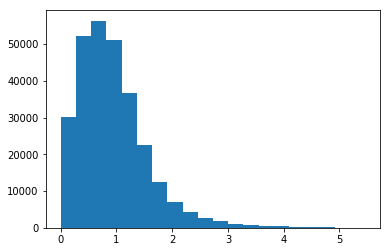

In [2]:
vals = list(regression_coordstovals.lookup.values())
from matplotlib import pyplot as plt
plt.hist(np.array(vals).squeeze(), bins=20)
plt.show()

In [0]:
import keras
from keras import backend as K
import tensorflow as tf
from keras.callbacks import Callback
from tqdm import tqdm
from scipy.stats import spearmanr
from sklearn.metrics import roc_auc_score
from keras.constraints import max_norm


def predict_on_datagenerator(datagenerator, model, key=None):
  total_positives_preds = []
  total_positives_labels = []
  total_negatives_preds = []
  total_negatives_labels = []
  for batch_num in tqdm(range(len(datagenerator))):
    batch_inputs, batch_labels = datagenerator[batch_num]
    batch_preds = model.predict(batch_inputs)
    if (key is not None):
      batch_preds = batch_preds[key]
      batch_labels = batch_labels[key]
    batch_preds, batch_labels = (np.squeeze(batch_preds),
                                 np.squeeze(batch_labels))
    assert len(batch_labels.shape)==1
    positives_mask = batch_labels > 0.0
    negatives_mask = positives_mask==False
    total_positives_preds.extend(batch_preds[positives_mask])
    total_positives_labels.extend(batch_labels[positives_mask])
    total_negatives_preds.extend(batch_preds[negatives_mask])
    total_negatives_labels.extend(batch_labels[negatives_mask])

  total_positives_preds = np.array(total_positives_preds)
  total_positives_labels = np.array(total_positives_labels)
  total_negatives_preds = np.array(total_negatives_preds)
  total_negatives_labels = np.array(total_negatives_labels)
  
  return (total_positives_preds, total_positives_labels,
          total_negatives_preds, total_negatives_labels)


class SeparatePositivesNegativesMseHistory(Callback):
  
  def __init__(self, datasetname, datagenerator, interval_of_evaluation):
    self.datasetname = datasetname
    self.datagenerator = datagenerator
    self.interval_of_evaluation = interval_of_evaluation
    self.batches_since_last_eval = 0
    self.positives_mse_history = []
    self.recentered_positives_mse_history = []
    self.positives_spearman_history = []
    self.auroc_history = []
    self.negatives_mse_history = []
    self.recentered_negatives_mse_history = []
    
  def on_batch_end(self, *args, **kwargs):
    
    self.batches_since_last_eval =(
      (1+self.batches_since_last_eval)%self.interval_of_evaluation)
    
    if (self.batches_since_last_eval==0):   
      
      (total_positives_preds, total_positives_labels,
        total_negatives_preds, total_negatives_labels) = (
        predict_on_datagenerator(datagenerator=self.datagenerator,
                                 model=self.model,
                                 key=1))
         
      num_positives = len(total_positives_preds)
      num_negatives = len(total_negatives_preds)
      
      positives_mse = np.mean(
          np.square(total_positives_preds-total_positives_labels))
      negatives_mse = np.mean(
          np.square(total_negatives_preds-total_negatives_labels))
      recentered_positives_mse = np.mean(
          np.square((total_positives_preds-np.mean(total_positives_preds))
                    -(total_positives_labels-np.mean(total_positives_labels))))
      recentered_negatives_mse = np.mean(
          np.square((total_negatives_preds-np.mean(total_negatives_preds))
                    -(total_negatives_labels-np.mean(total_negatives_labels))))
      
      positives_spearman = spearmanr(a=total_positives_preds,
                                     b=total_positives_labels)[0]
      auroc = roc_auc_score(y_true=[1 for x in total_positives_preds]+
                                   [0 for x in total_negatives_preds],
                            y_score=list(total_positives_preds)
                                    +list(total_negatives_preds))
      
      self.auroc_history.append(auroc)
      self.positives_spearman_history.append(positives_spearman)
      self.positives_mse_history.append(positives_mse)
      self.recentered_positives_mse_history.append(recentered_positives_mse)
      self.negatives_mse_history.append(negatives_mse)
      self.recentered_negatives_mse_history.append(recentered_negatives_mse)

      print("\n"+self.datasetname+": Mean mse over",num_positives,
            "positives is",positives_mse,
            "recentered",recentered_positives_mse)
      print(self.datasetname+": positives spearman",positives_spearman)
      print(self.datasetname+": auroc",auroc)
      print(self.datasetname+": Mean mse over",num_negatives,
            "negatives is",negatives_mse,
            "recentered",recentered_negatives_mse)
    

class CatchOverfittingOnPositives(SeparatePositivesNegativesMseHistory):
  
  def __init__(self, validation_data, interval_of_evaluation, patience):
    super(CatchOverfittingOnPositives, self).__init__(
        datasetname="validation set",
        datagenerator=validation_data,
        interval_of_evaluation=interval_of_evaluation)
    self.patience = patience
    self.rounds_waited = 0
    self.best_positives_loss = None
    self.best_weights = None
    self.stopped_epoch = None
    
  def on_batch_end(self, *args, **kwargs):
    
    super(CatchOverfittingOnPositives, self).on_batch_end(*args, **kwargs)
    if (self.batches_since_last_eval==0):  
      auroc = self.auroc_history[-1]
      if (self.best_positives_loss is None or
          self.best_positives_loss <= auroc):
        print("New best!")
        self.best_weights = self.model.get_weights()
        self.best_positives_loss = auroc
        self.rounds_waited = 0
      else:
        self.rounds_waited += 1
        if (self.rounds_waited >= self.patience):
          self.model.stop_training = True
          print("Restoring weights from the best round")
          self.model.set_weights(self.best_weights)
    

def manual_mse(y_true, y_pred):
  return K.mean(K.square(y_pred-y_true), axis=-1)

def mse_on_positives(y_true, y_pred):
  the_mask = tf.greater(y_true, 0.0)
  masked_y_true = tf.boolean_mask(y_true, the_mask)
  masked_y_pred = tf.boolean_mask(y_pred, the_mask)
  return K.mean(K.square(masked_y_pred-masked_y_true),axis=-1)

def mse_on_negatives(y_true, y_pred):
  the_mask = tf.equal(y_true, 0.0)
  masked_y_true = tf.boolean_mask(y_true, the_mask)
  masked_y_pred = tf.boolean_mask(y_pred, the_mask)
  return K.mean(K.square(masked_y_pred-masked_y_true),axis=-1)


def get_model(num_conv_filters,
              conv_filter_length,
              pool_length_and_stride,
              num_dense_units,
              adam_lr):
  input = keras.layers.Input(shape=(1000,4), name="sequence")
  conv1 = keras.layers.convolutional.Conv1D(
              filters=num_conv_filters, kernel_size=conv_filter_length,
              kernel_constraint=max_norm(7.0,axis=-1),
              padding="same")(input)
  conv1batchnorm = keras.layers.normalization.BatchNormalization()(conv1)
  conv1relu = keras.layers.core.Activation(activation="relu")(conv1batchnorm)
  conv2 = keras.layers.convolutional.Conv1D(
              filters=num_conv_filters,
              kernel_size=conv_filter_length,
              padding="same")(conv1relu)
  conv2batchnorm = keras.layers.normalization.BatchNormalization()(conv2)
  conv2relu = keras.layers.core.Activation(activation="relu")(conv2batchnorm)
  conv3 = keras.layers.convolutional.Conv1D(
              filters=num_conv_filters,
              kernel_size=conv_filter_length,
              padding="same")(conv2relu)
  conv3batchnorm = keras.layers.normalization.BatchNormalization()(conv3)
  conv3relu = keras.layers.core.Activation(activation="relu")(conv3batchnorm)
  avgpool = keras.layers.convolutional.AveragePooling1D(
                pool_size=pool_length_and_stride,
                strides=pool_length_and_stride)(conv3relu)
  flatten = keras.layers.core.Flatten()(avgpool)
  dense1 = keras.layers.core.Dense(units=num_dense_units)(flatten)
  dense1batchnorm = keras.layers.normalization.BatchNormalization()(dense1)
  dense1relu = keras.layers.core.Activation(activation="relu")(dense1batchnorm)
  dense1dropout = keras.layers.core.Dropout(0.2)(dense1relu)
  
  classif_output =\
    keras.layers.core.Activation(activation="sigmoid",
                                 name="classif_output")(
          keras.layers.core.Dense(units=1)(dense1dropout))
  regression_output_premult =\
    keras.layers.core.Activation(activation="relu")(
          keras.layers.core.Dense(units=1)(dense1dropout))
  regression_output = keras.layers.Multiply(name="regression_output")(
                          [classif_output, regression_output_premult])
  
  conv_model = keras.models.Model(inputs=input,
                                  outputs=[classif_output, regression_output])
  conv_model.compile(optimizer=keras.optimizers.Adam(lr=adam_lr),
                     loss=["binary_crossentropy", "mse"])
  return conv_model

conv_model = get_model(num_conv_filters=50,
                       conv_filter_length=15,
                       pool_length_and_stride=40,
                       num_dense_units=30,
                       adam_lr=0.0001)

conv_model.summary()
early_stopping_callback = CatchOverfittingOnPositives(
                              validation_data=valid_batch_generator,
                              interval_of_evaluation=len(train_batch_generator),
                              patience=20)
fit_history = conv_model.fit_generator(
  #x=train_batch_generator[0][0],
  #y=train_batch_generator[0][1],
  generator=train_batch_generator,
  epochs=300,
  callbacks=[early_stopping_callback,
             SeparatePositivesNegativesMseHistory(
              datasetname="minitrain",
              datagenerator=train_batch_generator,
              interval_of_evaluation=len(train_batch_generator))]
)
#the callback isn't triggered if the upper epoch limit is hit,
# so make sure the set the weights from the best epoch at the end
conv_model.set_weights(early_stopping_callback.best_weights)

W0905 07:46:45.353981 139929457473408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 07:46:45.376100 139929457473408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 07:46:45.378120 139929457473408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0905 07:46:45.486297 139929457473408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0905 07:46:45.738223 

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sequence (InputLayer)           (None, 1000, 4)      0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 1000, 50)     3050        sequence[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 1000, 50)     200         conv1d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 1000, 50)     0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

Compare perf to models trained in the DragoNN tutorial, for context

In [8]:
![[ -e SPI1.regression.model.hdf5 ]] || wget http://mitra.stanford.edu/kundaje/projects/dragonn/SPI1.regression.model.hdf5 -O SPI1.regression.model.hdf5

--2019-09-04 22:59:34--  http://mitra.stanford.edu/kundaje/projects/dragonn/SPI1.regression.model.hdf5
Resolving mitra.stanford.edu (mitra.stanford.edu)... 171.67.96.243
Connecting to mitra.stanford.edu (mitra.stanford.edu)|171.67.96.243|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1709600 (1.6M)
Saving to: ‘SPI1.regression.model.hdf5’

SPI1.regression.mod 100%[===================>]   1.63M  1.91MB/s    in 0.9s    

2019-09-04 22:59:35 (1.91 MB/s) - ‘SPI1.regression.model.hdf5’ saved [1709600/1709600]



In [20]:
![[ -e SPI1.classification.model.hdf5 ]] || wget http://mitra.stanford.edu/kundaje/projects/dragonn/SPI1.classification.model.hdf5 -O SPI1.classification.model.hdf5

--2019-09-05 00:31:29--  http://mitra.stanford.edu/kundaje/projects/dragonn/SPI1.classification.model.hdf5
Resolving mitra.stanford.edu (mitra.stanford.edu)... 171.67.96.243
Connecting to mitra.stanford.edu (mitra.stanford.edu)|171.67.96.243|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1710232 (1.6M)
Saving to: ‘SPI1.classification.model.hdf5’

SPI1.classification 100%[===================>]   1.63M  2.43MB/s    in 0.7s    

2019-09-05 00:31:30 (2.43 MB/s) - ‘SPI1.classification.model.hdf5’ saved [1710232/1710232]



In [0]:
from keras.models import Sequential
from keras.layers.core import Dropout, Reshape, Dense, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import max_norm
from keras.layers.normalization import BatchNormalization

reg_model=Sequential()
reg_model.add(Reshape((1,1000,4), input_shape=(1000,4)))
reg_model.add(Conv2D(filters=50,kernel_size=(1,15),
                 padding="same",
                 kernel_constraint=max_norm(7.0,axis=-1),
                 input_shape=(1,1000,4)))
reg_model.add(BatchNormalization(axis=-1))
reg_model.add(Activation('relu'))
reg_model.add(Conv2D(filters=50,
                 kernel_size=(1,15),
                 padding="same"))
reg_model.add(BatchNormalization(axis=-1))
reg_model.add(Activation('relu'))
reg_model.add(Conv2D(filters=50,
                 kernel_size=(1,13),
                 padding="same"))
reg_model.add(BatchNormalization(axis=-1))
reg_model.add(Activation('relu'))
reg_model.add(MaxPooling2D(pool_size=(1,40)))
reg_model.add(Flatten())
reg_model.add(Dense(50))
reg_model.add(BatchNormalization(axis=-1))
reg_model.add(Activation('relu'))
reg_model.add(Dropout(0.2))
reg_model.add(Dense(1))
reg_model.load_weights("SPI1.regression.model.hdf5")

classification_model=Sequential()
classification_model.add(Reshape((1,1000,4), input_shape=(1000,4)))
classification_model.add(Conv2D(filters=50,kernel_size=(1,15),padding="same", kernel_constraint=max_norm(7.0,axis=-1),input_shape=(1,1000,4)))
classification_model.add(BatchNormalization(axis=-1))
classification_model.add(Activation('relu'))
classification_model.add(Conv2D(filters=50,kernel_size=(1,15),padding="same"))
classification_model.add(BatchNormalization(axis=-1))
classification_model.add(Activation('relu'))
classification_model.add(Conv2D(filters=50,kernel_size=(1,13),padding="same"))
classification_model.add(BatchNormalization(axis=-1))
classification_model.add(Activation('relu'))
classification_model.add(MaxPooling2D(pool_size=(1,40)))
classification_model.add(Flatten())
classification_model.add(Dense(50))
classification_model.add(BatchNormalization(axis=-1))
classification_model.add(Activation('relu'))
classification_model.add(Dropout(0.2))
classification_model.add(Dense(1))
classification_model.add(Activation("sigmoid"))
classification_model.load_weights('SPI1.classification.model.hdf5')

In [29]:
(reg_model_valid_positives_preds,
 reg_model_valid_positives_labels,
 reg_model_valid_negatives_preds,
 reg_model_valid_negatives_labels) = predict_on_datagenerator(
    datagenerator=valid_batch_generator,
    model=reg_model)

100%|██████████| 718/718 [00:40<00:00, 17.75it/s]


In [30]:
from sklearn.metrics import average_precision_score, roc_auc_score

print(spearmanr(list(reg_model_valid_positives_preds),
                list(reg_model_valid_positives_labels)))
print(spearmanr(list(reg_model_valid_positives_preds)+list(reg_model_valid_negatives_preds),
          list(reg_model_valid_positives_labels)+list(reg_model_valid_negatives_labels)))
print(average_precision_score(
  y_true=[1 for x in reg_model_valid_positives_preds]+[0 for x in reg_model_valid_negatives_preds],
  y_score=list(reg_model_valid_positives_preds)+list(reg_model_valid_negatives_preds)))
print(roc_auc_score(
  y_true=[1 for x in reg_model_valid_positives_preds]+[0 for x in reg_model_valid_negatives_preds],
  y_score=list(reg_model_valid_positives_preds)+list(reg_model_valid_negatives_preds)))

SpearmanrResult(correlation=0.13010048765970836, pvalue=1.5316172772967612e-24)
SpearmanrResult(correlation=0.5330318150030029, pvalue=0.0)
0.8152531767958435
0.9511595861381462


In [25]:
(classification_model_valid_positives_preds,
 classification_model_valid_positives_labels,
 classification_model_valid_negatives_preds,
 classification_model_valid_negatives_labels) = predict_on_datagenerator(
    datagenerator=valid_batch_generator,
    model=classification_model)

100%|██████████| 718/718 [00:39<00:00, 18.13it/s]


In [31]:
from sklearn.metrics import average_precision_score, roc_auc_score

print(spearmanr(list(classification_model_valid_positives_preds),
                list(classification_model_valid_positives_labels)))
print(spearmanr(list(classification_model_valid_positives_preds)
                +list(classification_model_valid_negatives_preds),
                list(classification_model_valid_positives_labels)
                +list(classification_model_valid_negatives_labels)))
print(average_precision_score(
  y_true=[1 for x in classification_model_valid_positives_preds]
         +[0 for x in classification_model_valid_negatives_preds],
  y_score=list(classification_model_valid_positives_preds)
          +list(classification_model_valid_negatives_preds)))
print(roc_auc_score(
  y_true=[1 for x in classification_model_valid_positives_preds]
         +[0 for x in classification_model_valid_negatives_preds],
  y_score=list(classification_model_valid_positives_preds)
          +list(classification_model_valid_negatives_preds)))


SpearmanrResult(correlation=0.09068591811093571, pvalue=1.146530073452283e-12)
SpearmanrResult(correlation=0.5391060587840305, pvalue=0.0)
0.8252834433603818
0.9565124425324061
